#📌 Extracción

In [178]:
import pandas as pd
import requests
import json
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

### Importar datos

In [139]:
url = "https://raw.githubusercontent.com/ingridcristh/challenge2-data-science-LATAM/refs/heads/main/TelecomX_Data.json"

In [140]:
df_importado = pd.read_json(url)

In [141]:
# dataframe de los datos importados
df_importado.head()

,customerID,Churn,customer,phone,internet,account
0,0002-ORFBO,No,"{'gender': 'Female', 'SeniorCitizen': 0, 'Part...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'DSL', 'OnlineSecurity': '...","{'Contract': 'One year', 'PaperlessBilling': '..."
1,0003-MKNFE,No,"{'gender': 'Male', 'SeniorCitizen': 0, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'Yes'}","{'InternetService': 'DSL', 'OnlineSecurity': '...","{'Contract': 'Month-to-month', 'PaperlessBilli..."
2,0004-TLHLJ,Yes,"{'gender': 'Male', 'SeniorCitizen': 0, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'Fiber optic', 'OnlineSecu...","{'Contract': 'Month-to-month', 'PaperlessBilli..."
3,0011-IGKFF,Yes,"{'gender': 'Male', 'SeniorCitizen': 1, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'Fiber optic', 'OnlineSecu...","{'Contract': 'Month-to-month', 'PaperlessBilli..."
4,0013-EXCHZ,Yes,"{'gender': 'Female', 'SeniorCitizen': 1, 'Part...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'Fiber optic', 'OnlineSecu...","{'Contract': 'Month-to-month', 'PaperlessBilli..."


### Normalizar dataframe

In [142]:
basic_df = df_importado[['customerID',"Churn"]].copy()

In [143]:
customer_df = pd.json_normalize(df_importado["customer"]) # Normalizar cada columna del dataframe en uno diferente
phone_df = pd.json_normalize(df_importado["phone"])
internet_df = pd.json_normalize(df_importado["internet"])
account_df = pd.json_normalize(df_importado["account"])

In [144]:
df = pd.concat([basic_df, customer_df, phone_df, internet_df, account_df], axis=1) # concatenar cada columna de los dataframes en uno solo

In [145]:
df

,customerID,Churn,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,...,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,Charges.Monthly,Charges.Total
0,0002-ORFBO,No,Female,0,Yes,Yes,9,Yes,No,DSL,...,Yes,No,Yes,Yes,No,One year,Yes,Mailed check,65.60,593.3
1,0003-MKNFE,No,Male,0,No,No,9,Yes,Yes,DSL,...,No,No,No,No,Yes,Month-to-month,No,Mailed check,59.90,542.4
2,0004-TLHLJ,Yes,Male,0,No,No,4,Yes,No,Fiber optic,...,No,Yes,No,No,No,Month-to-month,Yes,Electronic check,73.90,280.85
3,0011-IGKFF,Yes,Male,1,Yes,No,13,Yes,No,Fiber optic,...,Yes,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,98.00,1237.85
4,0013-EXCHZ,Yes,Female,1,Yes,No,3,Yes,No,Fiber optic,...,No,No,Yes,Yes,No,Month-to-month,Yes,Mailed check,83.90,267.4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7262,9987-LUTYD,No,Female,0,No,No,13,Yes,No,DSL,...,No,No,Yes,No,No,One year,No,Mailed check,55.15,742.9
7263,9992-RRAMN,Yes,Male,0,Yes,No,22,Yes,Yes,Fiber optic,...,No,No,No,No,Yes,Month-to-month,Yes,Electronic check,85.10,1873.7
7264,9992-UJOEL,No,Male,0,No,No,2,Yes,No,DSL,...,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,50.30,92.75
7265,9993-LHIEB,No,Male,0,Yes,Yes,67,Yes,No,DSL,...,No,Yes,Yes,No,Yes,Two year,No,Mailed check,67.85,4627.65


#🔧 Transformación

### Conocer el conjunto de datos

In [146]:
df.info() # tipos de dato de cada columna

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7267 entries, 0 to 7266
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7267 non-null   object 
 1   Churn             7267 non-null   object 
 2   gender            7267 non-null   object 
 3   SeniorCitizen     7267 non-null   int64  
 4   Partner           7267 non-null   object 
 5   Dependents        7267 non-null   object 
 6   tenure            7267 non-null   int64  
 7   PhoneService      7267 non-null   object 
 8   MultipleLines     7267 non-null   object 
 9   InternetService   7267 non-null   object 
 10  OnlineSecurity    7267 non-null   object 
 11  OnlineBackup      7267 non-null   object 
 12  DeviceProtection  7267 non-null   object 
 13  TechSupport       7267 non-null   object 
 14  StreamingTV       7267 non-null   object 
 15  StreamingMovies   7267 non-null   object 
 16  Contract          7267 non-null   object 


Diccionario de datos
* customerID: número de identificación único de cada cliente
* Churn: si el cliente dejó o no la empresa
* gender: género (masculino y femenino)
* SeniorCitizen: información sobre si un cliente tiene o no una edad igual o mayor a 65 años
* Partner: si el cliente tiene o no una pareja
* Dependents: si el cliente tiene o no dependientes
* tenure: meses de contrato del cliente
* PhoneService: suscripción al servicio telefónico
* MultipleLines: suscripción a más de una línea telefónica
* InternetService: suscripción a un proveedor de internet
* OnlineSecurity: suscripción adicional de seguridad en línea
* OnlineBackup: suscripción adicional de respaldo en línea
* DeviceProtection: suscripción adicional de protección del dispositivo
* TechSupport: suscripción adicional de soporte técnico, menor tiempo de espera
* StreamingTV: suscripción de televisión por cable
* StreamingMovies: suscripción de streaming de películas
* Contract: tipo de contrato
* PaperlessBilling: si el cliente prefiere recibir la factura en línea
* PaymentMethod: forma de pago
* Charges.Monthly: total de todos los servicios del cliente por mes
* Charges.Total: total gastado por el cliente

In [147]:
df.sample(10)

,customerID,Churn,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,...,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,Charges.Monthly,Charges.Total
4230,5816-QVHRX,No,Female,0,No,No,37,Yes,Yes,Fiber optic,...,No,No,Yes,Yes,Yes,Month-to-month,No,Credit card (automatic),100.30,3541.4
4147,5686-CMAWK,No,Male,0,No,No,17,Yes,Yes,Fiber optic,...,No,Yes,Yes,No,No,One year,No,Electronic check,86.75,1410.25
3267,4558-CGYCZ,No,Male,0,No,No,4,Yes,No,No,...,No internet service,No internet service,No internet service,No internet service,No internet service,Month-to-month,No,Mailed check,19.75,78.3
4903,6702-OHFWR,Yes,Male,1,No,No,1,No,No phone service,DSL,...,Yes,Yes,No,No,Yes,Month-to-month,Yes,Electronic check,43.30,43.3
3715,5127-BZENZ,No,Female,0,Yes,Yes,56,Yes,Yes,DSL,...,No,No,No,Yes,No,One year,No,Bank transfer (automatic),65.20,3512.15
3390,4702-HDRKD,No,Male,0,No,No,67,No,No phone service,DSL,...,No,Yes,Yes,Yes,No,One year,Yes,Bank transfer (automatic),49.35,3321.35
2988,4140-MUHUG,Yes,Female,1,No,No,3,Yes,No,Fiber optic,...,No,Yes,No,Yes,No,Month-to-month,Yes,Electronic check,86.85,220.95
2767,3831-YCPUO,No,Female,0,Yes,Yes,72,Yes,No,Fiber optic,...,Yes,Yes,Yes,Yes,Yes,Two year,Yes,Credit card (automatic),109.50,7854.9
1212,1730-ZMAME,No,Female,1,No,No,32,Yes,No,Fiber optic,...,No,No,No,No,Yes,Month-to-month,Yes,Electronic check,79.50,2665
489,0691-IFBQW,Yes,Female,1,No,No,46,Yes,Yes,Fiber optic,...,Yes,Yes,No,Yes,Yes,One year,Yes,Electronic check,110.00,4874.8


In [148]:
columnas_importantes = ["customerID","Churn","tenure","Contract","Charges.Monthly","Charges.Total"]

### Comprobacion de incoherencias

Verificar que no haya datos nulos

In [149]:
df.isna().sum() # no hay ninguno

,0
customerID,0
Churn,0
gender,0
SeniorCitizen,0
Partner,0
Dependents,0
tenure,0
PhoneService,0
MultipleLines,0
InternetService,0


In [150]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7267 entries, 0 to 7266
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7267 non-null   object 
 1   Churn             7267 non-null   object 
 2   gender            7267 non-null   object 
 3   SeniorCitizen     7267 non-null   int64  
 4   Partner           7267 non-null   object 
 5   Dependents        7267 non-null   object 
 6   tenure            7267 non-null   int64  
 7   PhoneService      7267 non-null   object 
 8   MultipleLines     7267 non-null   object 
 9   InternetService   7267 non-null   object 
 10  OnlineSecurity    7267 non-null   object 
 11  OnlineBackup      7267 non-null   object 
 12  DeviceProtection  7267 non-null   object 
 13  TechSupport       7267 non-null   object 
 14  StreamingTV       7267 non-null   object 
 15  StreamingMovies   7267 non-null   object 
 16  Contract          7267 non-null   object 


Checar que no haya filas duplicadas

In [151]:
df.duplicated().sum()

np.int64(0)

Verificar si hay más de dos generos (perdon)

In [152]:
df["gender"].unique()

array(['Female', 'Male'], dtype=object)

In [153]:
df["Churn"].unique()

array(['No', 'Yes', ''], dtype=object)

In [154]:
df.query("Churn==''")

,customerID,Churn,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,...,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,Charges.Monthly,Charges.Total
30,0047-ZHDTW,,Female,0,No,No,11,Yes,Yes,Fiber optic,...,No,No,No,No,No,Month-to-month,Yes,Bank transfer (automatic),79.00,929.3
75,0120-YZLQA,,Male,0,No,No,71,Yes,No,No,...,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,Yes,Credit card (automatic),19.90,1355.1
96,0154-QYHJU,,Male,0,No,No,29,Yes,No,DSL,...,Yes,No,Yes,No,No,One year,Yes,Electronic check,58.75,1696.2
98,0162-RZGMZ,,Female,1,No,No,5,Yes,No,DSL,...,Yes,No,Yes,No,No,Month-to-month,No,Credit card (automatic),59.90,287.85
175,0274-VVQOQ,,Male,1,Yes,No,65,Yes,Yes,Fiber optic,...,Yes,Yes,No,Yes,Yes,One year,Yes,Bank transfer (automatic),103.15,6792.45
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7158,9840-GSRFX,,Female,0,No,No,14,Yes,Yes,DSL,...,Yes,No,No,No,No,One year,Yes,Mailed check,54.25,773.2
7180,9872-RZQQB,,Female,0,Yes,No,49,No,No phone service,DSL,...,No,No,No,Yes,No,Month-to-month,No,Bank transfer (automatic),40.65,2070.75
7211,9920-GNDMB,,Male,0,No,No,9,Yes,Yes,Fiber optic,...,No,No,No,No,No,Month-to-month,Yes,Electronic check,76.25,684.85
7239,9955-RVWSC,,Female,0,Yes,Yes,67,Yes,No,No,...,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,Yes,Bank transfer (automatic),19.25,1372.9


In [155]:
for columna in columnas_importantes:
  df[columna] = df[columna].replace("", np.nan).replace(" ", np.nan)

In [156]:
for columna in columnas_importantes:
  print(df[columna].isna().sum())

0
224
0
0
0
11


In [157]:
df = df.dropna() # eliminar los nulos encontrados

In [158]:
df

,customerID,Churn,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,...,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,Charges.Monthly,Charges.Total
0,0002-ORFBO,No,Female,0,Yes,Yes,9,Yes,No,DSL,...,Yes,No,Yes,Yes,No,One year,Yes,Mailed check,65.60,593.3
1,0003-MKNFE,No,Male,0,No,No,9,Yes,Yes,DSL,...,No,No,No,No,Yes,Month-to-month,No,Mailed check,59.90,542.4
2,0004-TLHLJ,Yes,Male,0,No,No,4,Yes,No,Fiber optic,...,No,Yes,No,No,No,Month-to-month,Yes,Electronic check,73.90,280.85
3,0011-IGKFF,Yes,Male,1,Yes,No,13,Yes,No,Fiber optic,...,Yes,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,98.00,1237.85
4,0013-EXCHZ,Yes,Female,1,Yes,No,3,Yes,No,Fiber optic,...,No,No,Yes,Yes,No,Month-to-month,Yes,Mailed check,83.90,267.4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7262,9987-LUTYD,No,Female,0,No,No,13,Yes,No,DSL,...,No,No,Yes,No,No,One year,No,Mailed check,55.15,742.9
7263,9992-RRAMN,Yes,Male,0,Yes,No,22,Yes,Yes,Fiber optic,...,No,No,No,No,Yes,Month-to-month,Yes,Electronic check,85.10,1873.7
7264,9992-UJOEL,No,Male,0,No,No,2,Yes,No,DSL,...,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,50.30,92.75
7265,9993-LHIEB,No,Male,0,Yes,Yes,67,Yes,No,DSL,...,No,Yes,Yes,No,Yes,Two year,No,Mailed check,67.85,4627.65


In [159]:
for columna in columnas_importantes: # verificar que no haya algun dato unico extraño en las columnas importantes
  print(columna)
  print("\n")
  print(df[columna].unique())

customerID


['0002-ORFBO' '0003-MKNFE' '0004-TLHLJ' ... '9992-UJOEL' '9993-LHIEB'
 '9995-HOTOH']
Churn


['No' 'Yes']
tenure


[ 9  4 13  3 71 63  7 65 54 72  5 56 34  1 45 50 23 55 26 69 37 49 66 67
 20 43 59 12 27  2 25 29 14 35 64 39 40 11  6 30 70 57 58 16 32 33 10 21
 61 15 44 22 24 19 47 62 46 52  8 60 48 28 41 53 68 31 36 17 18 51 38 42]
Contract


['One year' 'Month-to-month' 'Two year']
Charges.Monthly


[65.6  59.9  73.9  ... 91.75 68.8  67.85]
Charges.Total


['593.3' '542.4' '280.85' ... '742.9' '4627.65' '3707.6']


Columna de cuentas diarias

In [160]:
df.head()

,customerID,Churn,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,...,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,Charges.Monthly,Charges.Total
0,0002-ORFBO,No,Female,0,Yes,Yes,9,Yes,No,DSL,...,Yes,No,Yes,Yes,No,One year,Yes,Mailed check,65.6,593.3
1,0003-MKNFE,No,Male,0,No,No,9,Yes,Yes,DSL,...,No,No,No,No,Yes,Month-to-month,No,Mailed check,59.9,542.4
2,0004-TLHLJ,Yes,Male,0,No,No,4,Yes,No,Fiber optic,...,No,Yes,No,No,No,Month-to-month,Yes,Electronic check,73.9,280.85
3,0011-IGKFF,Yes,Male,1,Yes,No,13,Yes,No,Fiber optic,...,Yes,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,98.0,1237.85
4,0013-EXCHZ,Yes,Female,1,Yes,No,3,Yes,No,Fiber optic,...,No,No,Yes,Yes,No,Month-to-month,Yes,Mailed check,83.9,267.4


In [161]:
df["Cuentas_Diarias"] = df['Charges.Monthly']/30

/tmp/ipython-input-300787968.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["Cuentas_Diarias"] = df['Charges.Monthly']/30


In [162]:
df[["customerID","Charges.Monthly","Cuentas_Diarias"]].sample(10) # observar la cuenta diaria comparada a la cuenta mensual de varios clientes

,customerID,Charges.Monthly,Cuentas_Diarias
5470,7501-VTYLJ,51.55,1.718333
721,1032-MAELW,78.45,2.615000
6304,8670-MEFCP,92.90,3.096667
6651,9139-TWBAS,47.85,1.595000
3243,4526-RMTLL,76.15,2.538333
4790,6559-RAKOZ,97.95,3.265000
596,0848-ZGQIJ,94.65,3.155000
2591,3617-XLSGQ,109.25,3.641667
388,0562-FGDCR,74.55,2.485000
5159,7036-ZZKBD,66.40,2.213333


Estandarizacion y transformación


In [163]:
df.head(3)

,customerID,Churn,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,Charges.Monthly,Charges.Total,Cuentas_Diarias
0,0002-ORFBO,No,Female,0,Yes,Yes,9,Yes,No,DSL,...,No,Yes,Yes,No,One year,Yes,Mailed check,65.6,593.3,2.186667
1,0003-MKNFE,No,Male,0,No,No,9,Yes,Yes,DSL,...,No,No,No,Yes,Month-to-month,No,Mailed check,59.9,542.4,1.996667
2,0004-TLHLJ,Yes,Male,0,No,No,4,Yes,No,Fiber optic,...,Yes,No,No,No,Month-to-month,Yes,Electronic check,73.9,280.85,2.463333


In [164]:
df["Churn"] = df["Churn"].replace("No",0).replace("Yes",1) # Solo converti Churn porque considero que las demás no son tan importantes

/tmp/ipython-input-1805312490.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df["Churn"] = df["Churn"].replace("No",0).replace("Yes",1) # Solo converti Churn porque considero que las demás no son tan importantes
/tmp/ipython-input-1805312490.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["Churn"] = df["Churn"].replace("No",0).replace("Yes",1) # Solo converti Churn porque considero que las demás no son tan importantes


In [165]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7032 entries, 0 to 7266
Data columns (total 22 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7032 non-null   object 
 1   Churn             7032 non-null   int64  
 2   gender            7032 non-null   object 
 3   SeniorCitizen     7032 non-null   int64  
 4   Partner           7032 non-null   object 
 5   Dependents        7032 non-null   object 
 6   tenure            7032 non-null   int64  
 7   PhoneService      7032 non-null   object 
 8   MultipleLines     7032 non-null   object 
 9   InternetService   7032 non-null   object 
 10  OnlineSecurity    7032 non-null   object 
 11  OnlineBackup      7032 non-null   object 
 12  DeviceProtection  7032 non-null   object 
 13  TechSupport       7032 non-null   object 
 14  StreamingTV       7032 non-null   object 
 15  StreamingMovies   7032 non-null   object 
 16  Contract          7032 non-null   object 
 17  

In [166]:
df["Charges.Total"] = df["Charges.Total"].astype(np.float64)

/tmp/ipython-input-2917333210.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["Charges.Total"] = df["Charges.Total"].astype(np.float64)


In [167]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7032 entries, 0 to 7266
Data columns (total 22 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7032 non-null   object 
 1   Churn             7032 non-null   int64  
 2   gender            7032 non-null   object 
 3   SeniorCitizen     7032 non-null   int64  
 4   Partner           7032 non-null   object 
 5   Dependents        7032 non-null   object 
 6   tenure            7032 non-null   int64  
 7   PhoneService      7032 non-null   object 
 8   MultipleLines     7032 non-null   object 
 9   InternetService   7032 non-null   object 
 10  OnlineSecurity    7032 non-null   object 
 11  OnlineBackup      7032 non-null   object 
 12  DeviceProtection  7032 non-null   object 
 13  TechSupport       7032 non-null   object 
 14  StreamingTV       7032 non-null   object 
 15  StreamingMovies   7032 non-null   object 
 16  Contract          7032 non-null   object 
 17  

#📊 Carga y análisis

In [168]:
df[['Charges.Total',"Charges.Monthly","tenure","Churn",]].describe()

,Charges.Total,Charges.Monthly,tenure,Churn
count,7032.000000,7032.000000,7032.000000,7032.000000
mean,2283.300441,64.798208,32.421786,0.265785
std,2266.771362,30.085974,24.545260,0.441782
min,18.800000,18.250000,1.000000,0.000000
25%,401.450000,35.587500,9.000000,0.000000
50%,1397.475000,70.350000,29.000000,0.000000
75%,3794.737500,89.862500,55.000000,1.000000
max,8684.800000,118.750000,72.000000,1.000000


/tmp/ipython-input-1352361653.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x="Churn", data=df, palette=("tab10"))


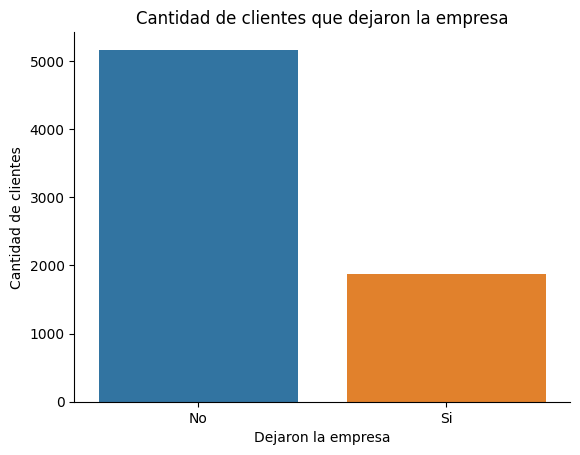

In [205]:
sns.countplot(x="Churn", data=df, palette=("tab10"))
plt.ylabel("Cantidad de clientes")
plt.xlabel("Dejaron la empresa")
plt.xticks([0,1],["No","Si"])
sns.despine()
plt.title("Cantidad de clientes que dejaron la empresa")
plt.show()

In [207]:
df.head(5)

,customerID,Churn,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,Charges.Monthly,Charges.Total,Cuentas_Diarias
0,0002-ORFBO,0,Female,0,Yes,Yes,9,Yes,No,DSL,...,No,Yes,Yes,No,One year,Yes,Mailed check,65.6,593.30,2.186667
1,0003-MKNFE,0,Male,0,No,No,9,Yes,Yes,DSL,...,No,No,No,Yes,Month-to-month,No,Mailed check,59.9,542.40,1.996667
2,0004-TLHLJ,1,Male,0,No,No,4,Yes,No,Fiber optic,...,Yes,No,No,No,Month-to-month,Yes,Electronic check,73.9,280.85,2.463333
3,0011-IGKFF,1,Male,1,Yes,No,13,Yes,No,Fiber optic,...,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,98.0,1237.85,3.266667
4,0013-EXCHZ,1,Female,1,Yes,No,3,Yes,No,Fiber optic,...,No,Yes,Yes,No,Month-to-month,Yes,Mailed check,83.9,267.40,2.796667


Conteo de evasión por variables categóricas

In [208]:
columnas_categoricas = ['gender','SeniorCitizen','Partner','Dependents','PhoneService','MultipleLines','InternetService','OnlineSecurity','OnlineBackup','DeviceProtection','TechSupport','StreamingTV','StreamingMovies','Contract','PaperlessBilling','PaymentMethod']

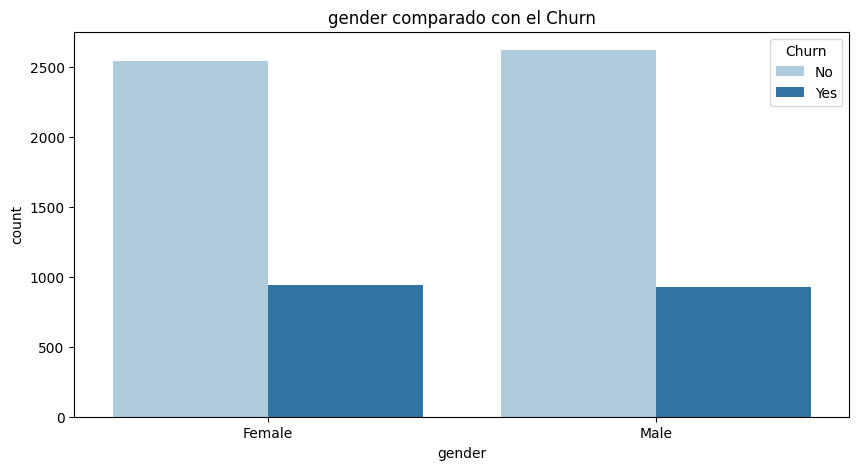

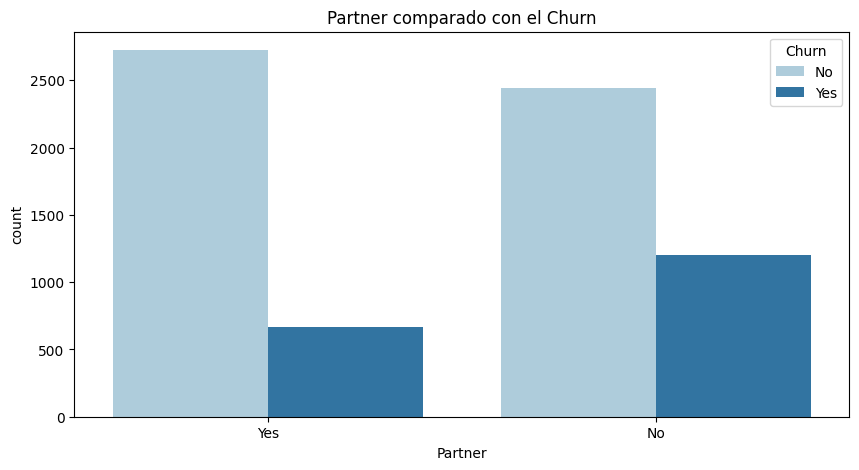

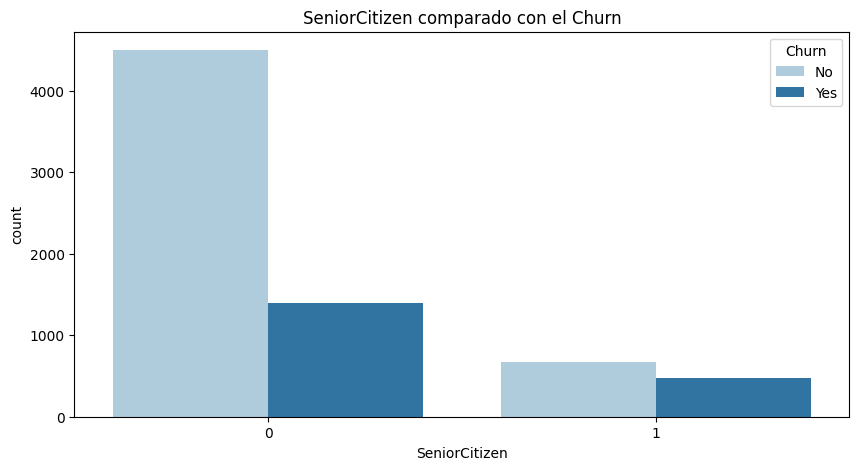

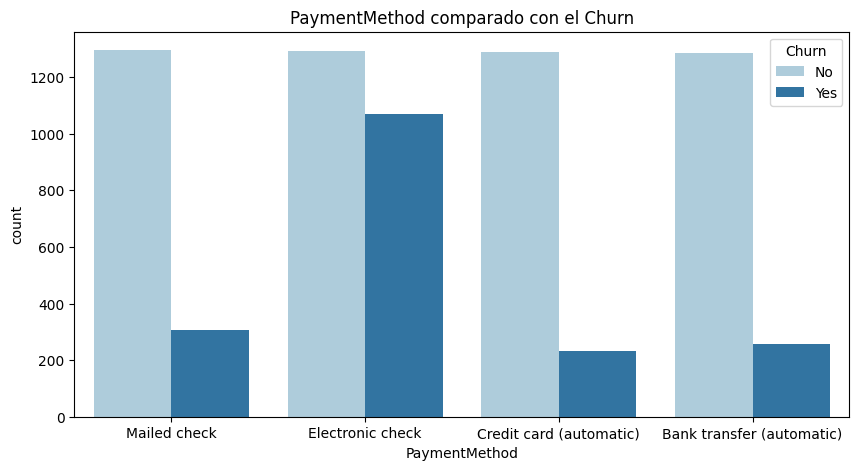

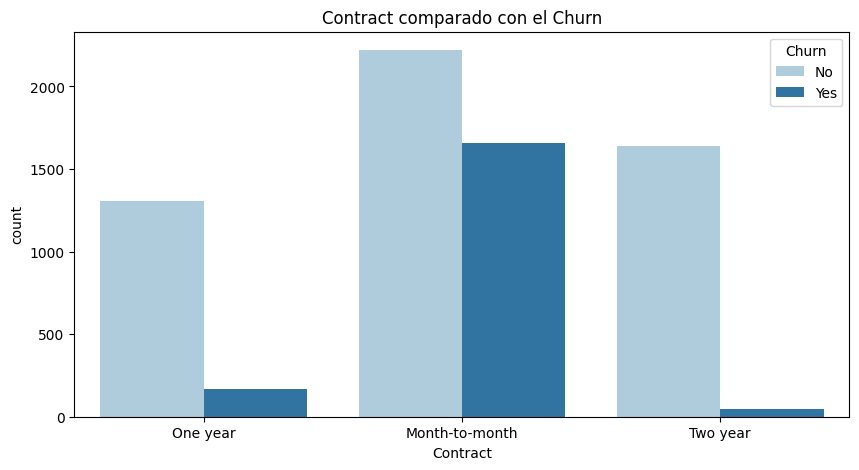

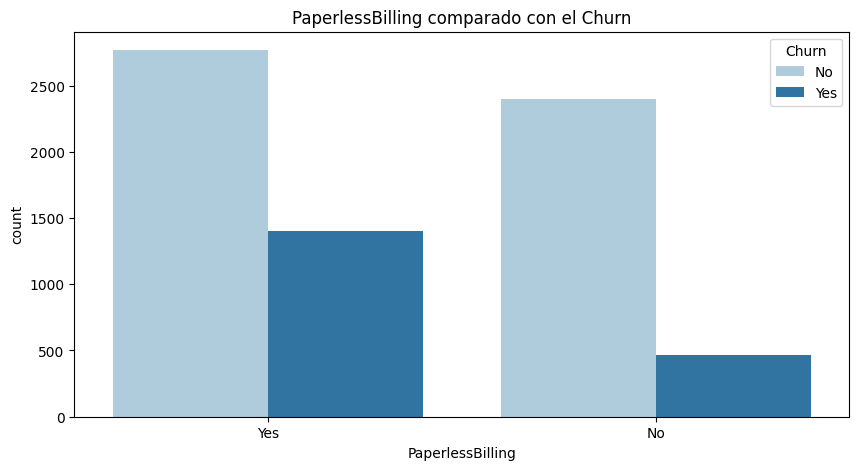

In [219]:
for columna in columnas_categoricas:
  plt.figure(figsize=(10,5))
  sns.countplot(data=df, x=columna, hue=df['Churn'].map({0:'No', 1:'Yes'}), palette="Paired")
  plt.title(f'{columna} comparado con el Churn')

Conteo de evasion por variables numéricas

In [221]:
columnas_numericas = ['tenure', 'Charges.Monthly', 'Charges.Total', 'Cuentas_Diarias']

/tmp/ipython-input-1791517222.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x=df["Churn"].map({0:"No", 1:"Yes"}), y=columna, palette="Paired")
/tmp/ipython-input-1791517222.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x=df["Churn"].map({0:"No", 1:"Yes"}), y=columna, palette="Paired")
/tmp/ipython-input-1791517222.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x=df["Churn"].map({0:"No", 1:"Yes"}), y=columna, palette="Paired")
/tmp/ipython-input-1791517222.py:3: FutureWarning: 

Passing `palette` wi

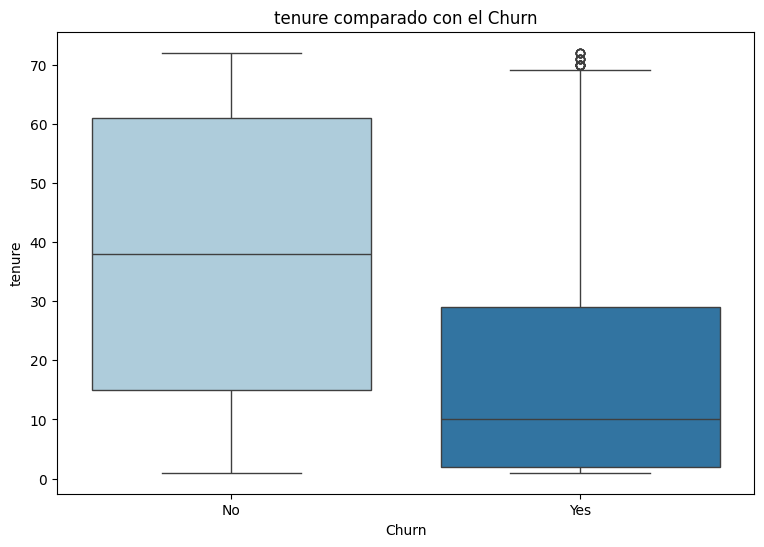

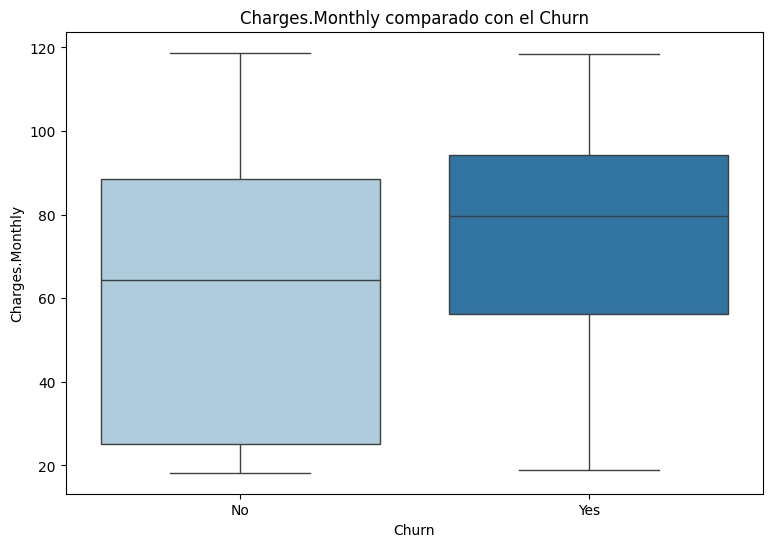

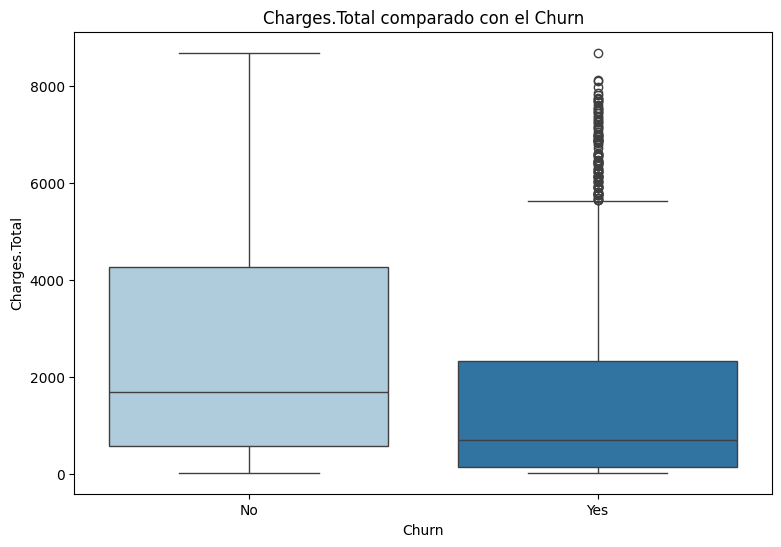

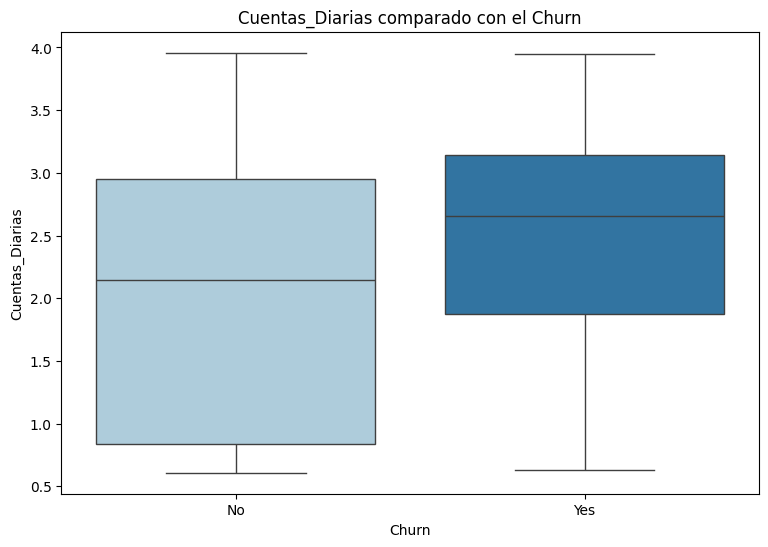

In [234]:
for columna in columnas_numericas:
  plt.figure(figsize=(9,6))
  sns.boxplot(data=df, x=df["Churn"].map({0:"No", 1:"Yes"}), y=columna, palette="Paired")
  plt.title(f'{columna} comparado con el Churn')
  plt.xlabel("Churn")
  plt.ylabel(columna)

#📄Informe final

## Introduccion
El objetivo de este análisis de evasión de clientes es identificar los factores que están provocando una perdida de clientes, tanto cosas categóricas como numéricas.

## Limpieza y tratamiento de datos
Lo primero realizado en este análisis fue la importación de los datos desde un archivo json, se utilizó un dataframe que fue importado y normalizado con la biblioteca pandas. Después de la importación, se verificaron los datos, se clasificaron las columnas en las relevantes y las no relevantes para este análisis, las relevantes fuerons tratadas, es decir, se revisó que los datos fueran consistentes y que no tuvieran incoherencias, asi como valores nulos o datos faltanes, en caso de que existiera alguna incoherencia, se borró todo ese registro que contenía la incoherencia, ya que, al tener muchos registros, no afecta gravemente en el análisis eliminar las pocas incoherencias encontradas.

## Análisis exploratorio de datos
Durante los análisis, se detectó que hay aproximadamente 1900 clientes que dejaron la empresa


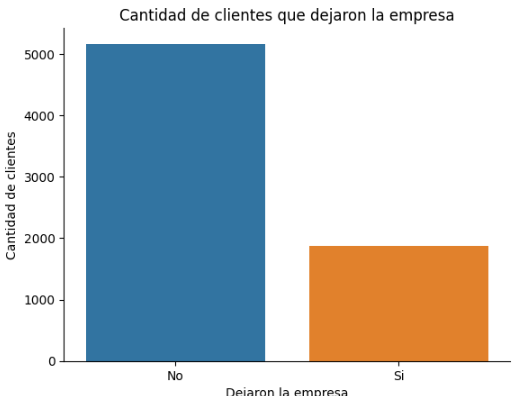

estos clientes varían los motivos, el motivo que mas destaca por tener el mayor numero de clientes que abandonan la empresa, es el tipo de contrato y el método de pago, se detectó que los clientes que pagan con un cheque electrónico son más propensos a abandonar la empresa, así como los que tienen un contrato mensual, estos tambien son los clientes que más abandonan la empresa en comparación a los demás tipos de contratos.

## Conclusiones e Insights
Los principales hallazgos encontrados fueron los mencionados anteriormente, se detectó una gran diferencia en los tipos de contratos y en los métodos de pago, el método de pago con cheque electrónico es mucho más propenso a abandonar la empresa y el contrato mensual es muy abandonado igualmente.

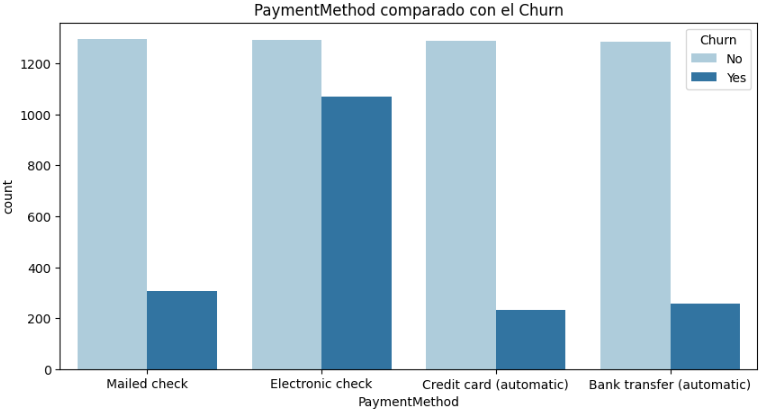
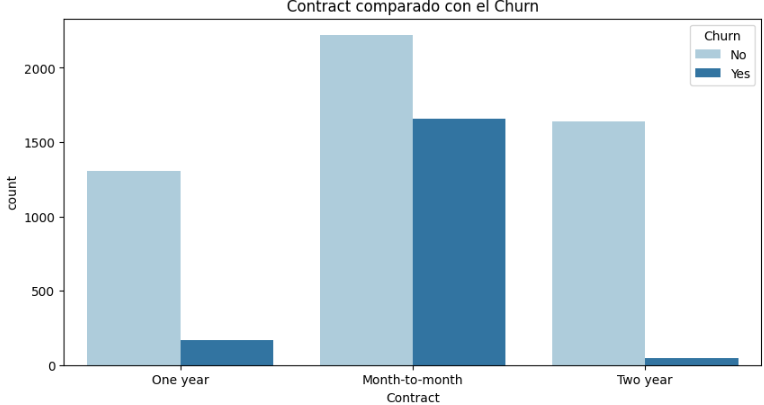

Más de 1600 clientes abandonan el plan mensual y más de 1000 con el método de pago del cheque electrónico.

## Recomendaciones
Segun el análisis realizado se dan las siguientes recomendaciones:
* Darle más prioridad a los contratos más largos aplicando beneficios en estos.
* Agregar más contratos a mediano plazo y no solo a largo plazo.
* Normalizar cierto tipo de pagos, los más populares.